### Import package

In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import os 
import pandas as pd 
import seaborn as sns; sns.set()
# Chart drawing
import plotly as py
import plotly.io as pio
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

## 1. Data Extraction

### Download and Prepare PHM08 dataset

In [2]:
df=pd.read_csv('/Users/philippebeliveau/Desktop/BSTA 478/Projet/creditcard.csv')
df.head(5)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# Divide data set between features and target
features=df.drop(['Class'], axis=1)
target = df['Class']

In [4]:
target_df=pd.DataFrame(target)

Information about the dataset: 

 The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

It contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues, we cannot provide the original features and more background information about the data. Features V1, V2, … V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-sensitive learning. Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

What does the columns represent:

PCA features
This new array has the same number of rows and columns as the original sample array. In particular, there is one row for each transformed sample. The columns of the new array correspond to "PCA features", just as the original features corresponded to columns of the original array.

PCA features are not correlated
It is often the case that the features of a dataset are correlated. This is the case with many of the features of the wine dataset, for instance. However, PCA, due to the rotation it performs, "de-correlates" the data, in the sense that the columns of the transformed array are not linearly correlated.!

So those columns are those PCA features

# Week 2 Perform EDA
2. Data cleaning: 
Define standards, drop columns, missing values, feature engineering 
    
3. Data visualization  (EDA): Derived insight from the data and engine



## 1. Data cleaning
### 2.1 Define standards, drop columns, missing values, feature engineering 

In [5]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Time,284807.0,9.481386e+04,47488.145955,0.000000,54201.500000,84692.000000,139320.500000,172792.000000
V1,284807.0,3.918649e-15,1.958696,-56.407510,-0.920373,0.018109,1.315642,2.454930
V2,284807.0,5.682686e-16,1.651309,-72.715728,-0.598550,0.065486,0.803724,22.057729
V3,284807.0,-8.761736e-15,1.516255,-48.325589,-0.890365,0.179846,1.027196,9.382558
V4,284807.0,2.811118e-15,1.415869,-5.683171,-0.848640,-0.019847,0.743341,16.875344
V5,284807.0,-1.552103e-15,1.380247,-113.743307,-0.691597,-0.054336,0.611926,34.801666
V6,284807.0,2.040130e-15,1.332271,-26.160506,-0.768296,-0.274187,0.398565,73.301626
V7,284807.0,-1.698953e-15,1.237094,-43.557242,-0.554076,0.040103,0.570436,120.589494
V8,284807.0,-1.893285e-16,1.194353,-73.216718,-0.208630,0.022358,0.327346,20.007208
V9,284807.0,-3.147640e-15,1.098632,-13.434066,-0.643098,-0.051429,0.597139,15.594995


In [6]:
print('The dataframe has {} rows'.format(df.shape[0]))
print('The dataframe has {} columns'.format(df.shape[1]))

The dataframe has 284807 rows
The dataframe has 31 columns


### Missing Values?

Make sure that our dataset does not possess any NaN values, and give some explanantion about what would this entails if we had some

In [7]:
# Look for NA values
df.isna().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

After having clean missing value, we are now left with this DataFrame to perform our EDA 

## Balance Dataset

To well visualize a dataset, it is important to balance the dataset, in this way, when plotting the the fraud vs non-fraud, we will have a better visual on them.

 Synthetic Minority Oversampling Technique (SMOTE)
The Synthetic Minority Oversampling Technique, or SMOTE, is another way of adjusting the imbalance by oversampling your minority observations, aka your fraud cases. But with SMOTE, we're not just copying the minority class. Instead, as you see in this picture, SMOTE uses characteristics of nearest neighbors of fraud cases to create new synthetic fraud cases, and thereby avoids duplicating observations.

In [5]:
# Look for the ratio of fraud over non-fraud
fraud = df[df['Class']==1].count().sum()
total_occurence = len(df)

per_fraud = fraud/total_occurence
print('The % of fraud in the dataset is {}%'.format(round(per_fraud*100)))
print('sum of the fraud is {}'.format(df[df['Class']==1].count().sum()))
# This highlight the need to resample

The % of fraud in the dataset is 5%
sum of the fraud is 15252


In [6]:
from imblearn.over_sampling import SMOTE 

# Here I am not scaling my data, as I would like to plot it on a scatter plot, which I believe will make it easier 
# to see because the data won't be aggregate in the same way as if they were scaled. 

method= SMOTE(random_state=42)
X_resampled, y_resampled = method.fit_resample(features, target)

In [7]:
# Have a look at the at the newly balance dataset 
# Look for the ratio of fraud over non-fraud
fraud_resample = y_resampled[y_resampled>=1].count()
total_occurence_resample = len(y_resampled)

per_fraud = fraud_resample/total_occurence_resample
print('The new % of fraud in the dataset is {}%'.format(round(per_fraud*100)))
# This highlight the need to resample

df_resampled= pd.concat([pd.DataFrame(X_resampled), pd.DataFrame({'Class': y_resampled})], axis=1)

The new % of fraud in the dataset is 50%


In [8]:
df_resampled

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.000000,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.620000,0
1,0.000000,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.690000,0
2,1.000000,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.660000,0
3,1.000000,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.500000,0
4,2.000000,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.990000,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568625,144838.659385,-6.379157,1.672637,-5.885670,2.068340,-0.668576,-3.336450,-4.995823,2.632847,-2.275158,...,0.641337,-0.249308,-2.311290,-0.159402,1.190079,-0.258067,0.777265,-0.728919,7.334751,1
568626,65965.011763,-2.479028,0.958932,-1.782249,1.541783,-1.191990,-0.466794,-1.957161,0.312580,-0.433956,...,0.351983,0.208869,-0.235986,-0.404446,0.220454,0.685263,-0.890346,0.598736,74.507571,1
568627,34592.129093,-1.799894,2.368957,-2.673997,1.705968,-1.355923,-1.121788,-2.057832,-1.677459,-0.659287,...,1.473371,-0.581778,-0.013899,-0.144597,0.120315,0.242272,-0.121166,-0.534238,102.486823,1
568628,129683.002907,0.255234,2.432041,-5.388252,3.793925,-0.230814,-1.382725,-1.572929,0.748305,-1.600633,...,0.316760,-0.036858,0.182968,0.190701,-0.339250,-0.272824,0.315507,-0.091005,58.346854,1


## Scale resample

In [9]:
#Fit transform scaling to features
X = np.array(X_resampled).astype(np.float)

scaler=MinMaxScaler()
X_scaled_resampled=scaler.fit_transform(X)

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:2: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



## 2. EDA

#### Histogram

In [13]:
# We see here that the highest amount spend when there was a fraud is 2125$, thus this tells us how to arrange our bins
df['Amount'].loc[df['Class']==1].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

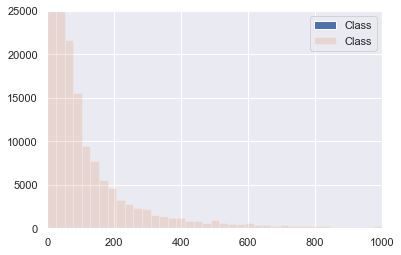

In [14]:
# Let's look at amount given the class
#This tells us that our distribution is very skewed 
df_fraud = df.loc[df['Class']==1]
df_nonfraud=df.loc[df['Class']==0]

plt.hist(df_fraud["Amount"], bins=1000, label='Class', alpha=1)
plt.hist(df_nonfraud["Amount"], bins=1000, label='Class', alpha=0.20)
plt.legend()
plt.xlim(0, 1000)
plt.ylim(0, 25000)

plt.show()

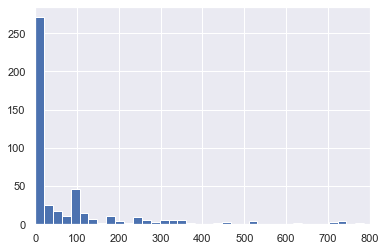

In [15]:
df_fraud = df.loc[df['Class']==1]

plt.hist(df_fraud["Amount"], bins=100, label='Class', density=False, alpha=1)
plt.xlim(0, 800)
plt.show()

#### Boxplot

<AxesSubplot:>

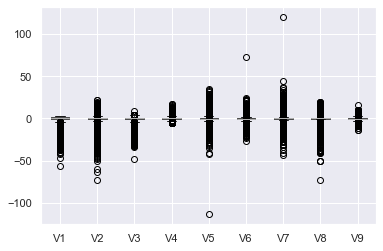

In [16]:
features.iloc[:,1:10].boxplot()

#### SNS matrix

In [ ]:
# Performing pairwise comparison with corr_matrix is not well suited, as there is too many features and data
# So what could we do about it? 
df_reduced=df.iloc[:1000, 20:]
sns.pairplot(df_reduced, hue='Class', diag_kind='hist')
plt.show()

### T_SNE visualization
t-SNE stands for "t-distributed stochastic neighbor embedding". It has a complicated name, but it serves a very simple purpose. It maps samples from their high-dimensional space into a 2- or 3-dimensional space so they can visualized. While some distortion is inevitable, t-SNE does a great job of approximately representing the distances between the samples. For this reason, t-SNE is an invaluable visual aid for understanding a dataset.

In [9]:
# The visualization should be done when I rebalance the data 

from sklearn.manifold import TSNE

m=TSNE(learning_rate=50)

In [10]:
tsne_features = m.fit_transform(X_scaled_resampled)

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/sklearn/manifold/_t_sne.py:783: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.



In [12]:
tsne_features[1:4]

array([[ 3.3123288, -5.824878 ],
       [ 4.388007 ,  5.5399265],
       [ 2.8567796, -5.703382 ]], dtype=float32)

In [15]:
tsne_features.shape

(568630, 2)

In [22]:
df_resampled['x']=tsne_features[:,0]
df_resampled['y']=tsne_features[:,1]

<function matplotlib.pyplot.show(close=None, block=None)>

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/IPython/core/pylabtools.py:151: UserWarning:

Creating legend with loc="best" can be slow with large amounts of data.



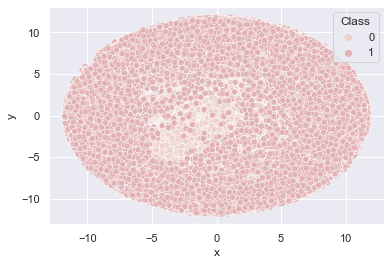

In [24]:
import seaborn as sns 

sns.scatterplot(x='x', y='y', hue='Class', data=df_resampled, alpha=0.90, sizes=(40, 400), hue_norm=(0, 7), legend="full")
plt.show

## K-means visualizatinon

You can't plot a cluster solely using Kmeans, as you haven't perform dimensionality reduction, you first need to use PCA. But here our job will be too find the right amount of cluster, using the elbow techniques

In [10]:
#Fit transform scaling to features

X = np.array(features).astype(np.float)

scaler=MinMaxScaler()
X_scaled=scaler.fit_transform(X)

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



### Non-resampled model

In [42]:
#KMeans model fit to data
model = KMeans(n_clusters=20, random_state=42).fit(X_scaled)

#get the cluster numbers for each datapoints
label = model.predict(X_scaled)

print(label)

print(model.inertia_)

[18 18 18 ... 14  4  6]
10766.378741625267


### Resampled model

In [13]:
#KMeans model fit to data
model = KMeans(n_clusters=20, random_state=42).fit(X_scaled_resampled)

#get the cluster numbers for each datapoints
label = model.predict(X_scaled_resampled)

print(label)

print(model.inertia_)

KeyboardInterrupt: 

In [16]:
# Prediction using the resampled model on the non-resampled data 

label_non_resampled = model.predict(X_scaled)

df_2 = pd.DataFrame({'label':label_non_resampled, 'Class':df['Class']})

crosstab = pd.crosstab(df_2['label'], df_2['Class'])
crosstab.transpose()

label,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
Class,,,,,,,,,,,,,,,,,,,,
0,347,36,0,14177,66959,13,70758,1333,17,10,0,0,58,0,0,68965,0,61641,0,1
1,33,67,23,6,17,48,16,24,21,21,6,27,57,9,29,16,29,12,6,25


Inertia:
    
We see that our inertia is extremely high, thus we should look for ways to decrease the inertia, to do this, we will look for the optimal number of cluster using the elbow method. 

inertia measures how far samples are from their centroids. You can find the precise definition in the scikit-learn documentation. We want clusters that are not spread out, so lower values of the inertia are better. 

#### Crosstab resampled

In [48]:
df_1 = pd.DataFrame({'label':label, 'Class':df_resampled['Class']})

crosstab = pd.crosstab(df_1['label'], df_1['Class'])
crosstab


Class,0,1
label,,
0,347,23823
1,36,41036
2,0,13047
3,14177,2558
4,66959,8330
5,13,27269
6,70758,8092
7,1333,13337
8,17,12233


#### Crosstab not-resampled

In [43]:

df = pd.DataFrame({'label':label, 'Class':df['Class']})

crosstab = pd.crosstab(df['label'], df['Class'])
crosstab

Class,0,1
label,,
0,9820,22
1,12313,9
2,16526,12
3,12081,5
4,4708,40
5,12565,5
6,20497,5
7,17025,16
8,21712,8


Here it is a representation of how our clusters are able to classify our datapoints. I am really not suprise by how shitty is it.

#### Elbow technique

	- Let's do a quick refresher on the elbow curve. The objective of k-means is to minimize the sum of all distances between the data samples and their associated cluster centroids. The score is the inverse of that minimization, so you want the score to be close to zero. By running a k-means model on clusters varying from 1 to 10, like this, and saving the scores for each model under score, you can obtain the elbow curve. Then it is a matter of simply plotting the scores against the number of clusters like this. Which results in the following plot.
    
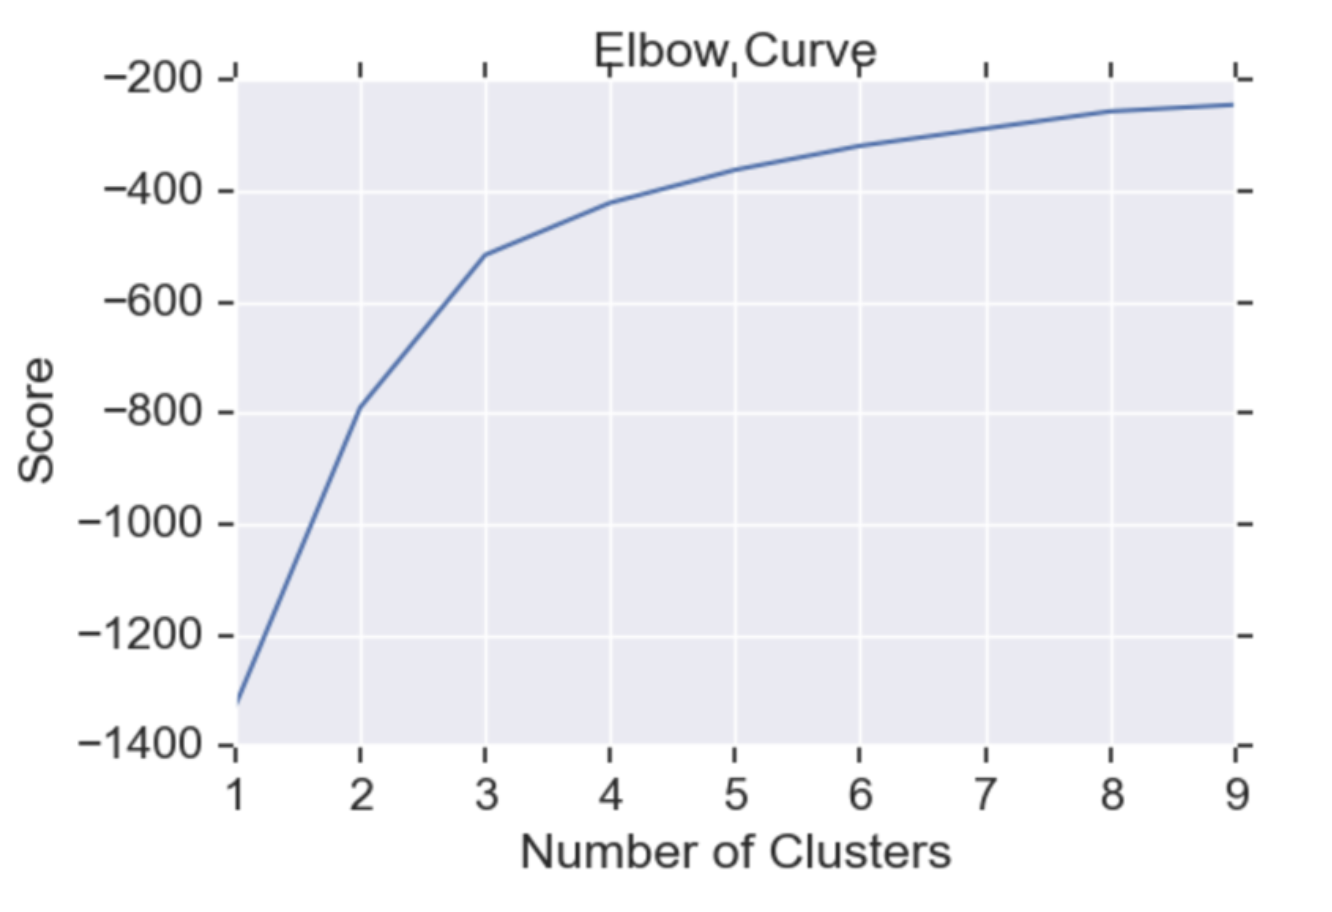

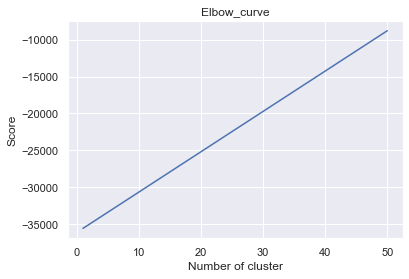

In [45]:
clust=(1,50)
kmeans = [KMeans(n_clusters=i, random_state=42) for i in clust]
score = [kmeans[i].fit(X_scaled).score(X_scaled) for i in range(len(kmeans))]
plt.plot(clust, score)
plt.xlabel('Number of cluster')
plt.ylabel('Score')
plt.title('Elbow_curve')
plt.show()


When Clustering Doesn’t Make Sense

https://towardsdatascience.com/when-clustering-doesnt-make-sense-c6ed9a89e9e6

## KMeans + PCA

/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:3: DeprecationWarning:

`np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



[0.55323648 0.2151192  0.05297858]


/Users/philippebeliveau/anaconda3/envs/TFT_Tensorflow/lib/python3.7/site-packages/ipykernel_launcher.py:15: MatplotlibDeprecationWarning:

Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.



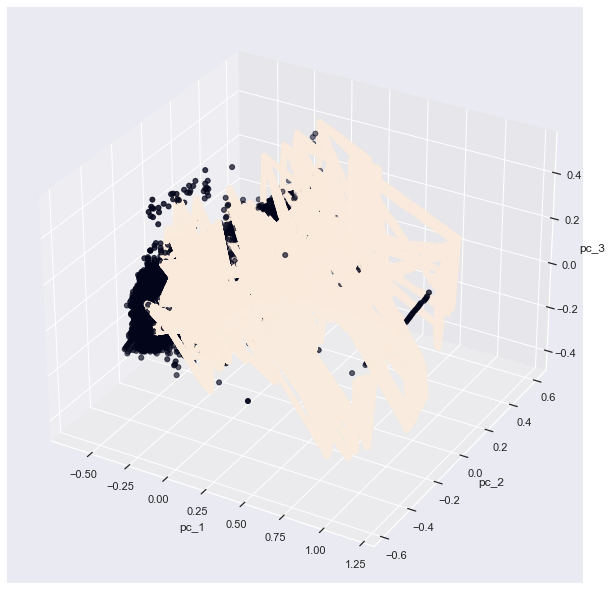

In [26]:
from mpl_toolkits.mplot3d import Axes3D

X = np.array(X_scaled_resampled).astype(np.float)
#y =df.iloc[:,30]
y = y_resampled

pca=PCA(3)
pca_result = pca.fit_transform(X_scaled_resampled)

print(pca.explained_variance_ratio_)

pca_df= pd.DataFrame(data=pca_result, columns=['pc_1', 'pc_2', 'pc_3'])
pca_df=pd.concat([pca_df, pd.DataFrame({'label':y})], axis=1)

ax = Axes3D(plt.figure(figsize=(8, 8)))
ax.scatter(xs=pca_df['pc_1'], ys=pca_df['pc_2'], zs=pca_df['pc_3'], c=pca_df['label'], s=25)
ax.set_xlabel("pc_1")
ax.set_ylabel("pc_2")
ax.set_zlabel("pc_3")
plt.show()

#So here every index refers to the cluster that he his in it
#So to plot the cluster, we